In [3]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Define the problem

**Given**: describe the data  
**Goal**: what will you try to infer from that data  

%%% Example %%%  
**Given**: historical data of how much dollars a company spent on ads in different media (TV, radio, newspapers) and the respective sales.  

**Goal**: predict what will be the sales given a particular add spendings.
    

## Prepare the data (Data Preprocessing)

### Load the data

In [4]:
path_to_file = "../../datasets/various/Advertising.csv"
df = pd.read_csv(path_to_file, index_col=0)

### Get insight of the data (Prepare and clean)

In [5]:
print(df.head(5))

print(df.shape)
# print(data_df.columns.values.tolist())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


**TV**:  dollars spent on TV ads for a single product (in thousands)  
**radio**: dollars spent on radio ads (in thousands)  
**newspaper**: dollars spent on newspaper ads (in thousands)    

**sales**: sales of a single product in a given market (in thousands)

In [6]:
df.groupby('sales').max().sort_index(ascending=False).head(5)

,TV,radio,newspaper
sales,,,
27.0,276.9,48.9,41.8
26.2,287.6,43.0,71.8
25.5,283.6,42.0,66.2
25.4,289.7,49.0,51.2
24.7,220.3,49.0,3.2


#### Clean

In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#### Visualize with Seaborn

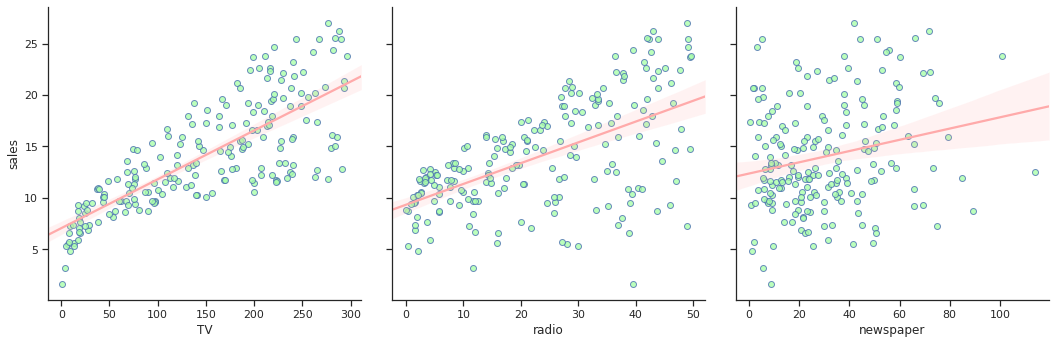

In [8]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, 
             x_vars=['TV','radio','newspaper'],              
             y_vars='sales',
             palette=sns.hls_palette(6, l=.6, s=.8),             
             markers=["o"],
             plot_kws={'line_kws':{'color':'#FFAAAA'},
                       'scatter_kws':{'facecolors':'#AAFFAA'}},
             size=5, aspect=1,kind='reg')


In [9]:
# show correlations
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


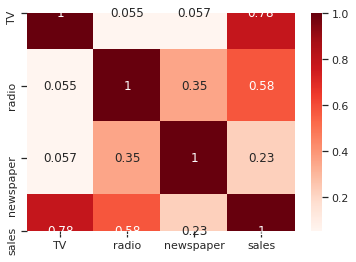

In [10]:
sns.heatmap(df.corr(),annot=True, cmap="Reds")


## Select features

From the data inspection being made, I'll decide to use the 'TV' ads as a feature.    

In [11]:
X = df[['TV', 'newspaper', 'radio']]
y = df['sales']
print(y.shape)

(200,)


## Separate the training data from the test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(f'X_train: {X_train[:5]}\n', f'y_train: {y_train[:5]}\n')
print(f'X_test: {X_test[:5]}\n', f'y_test: {y_test[:5]}\n')

X_train:         TV  newspaper  radio
115   78.2       34.5   46.8
174  168.4       12.8    7.1
6      8.7       75.0   48.9
127    7.8       50.6   38.9
118   76.4       14.8    0.8
 y_train: 115    14.6
174    11.7
6       7.2
127     6.6
118     9.4
Name: sales, dtype: float64

X_test:         TV  newspaper  radio
96   163.3       52.9   31.6
16   195.4       52.9   47.7
31   292.9       43.2   28.3
159   11.7       45.2   36.9
129  220.3        3.2   49.0
 y_test: 96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
Name: sales, dtype: float64



## Choose the model

We saw some linear correlation between 'TV' ads and sales, that's why we are going to start with LinearRegression.

In [13]:
from sklearn.linear_model import LinearRegression

## Train the model (fit the model)

In [14]:
# instantiate the model
model = LinearRegression()

In [15]:
fitted = model.fit(X_train,y_train)

In [16]:
# let's check the "learned" co-efficients:
print(fitted.intercept_)
print(fitted.coef_)

2.778303460245281
[0.04543356 0.00256809 0.19145654]


### Interpret the coefficients

## Predict (classify unknown input sample)

In [17]:
y_pred = fitted.predict(X_test)

## Evaluate the model

In [18]:
from sklearn import metrics

In [19]:
# get metrics:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

# print it
print('{:10s}: {}'.format('MAE: ', mae ) )
print('{:10s}: {}'.format('MSE: ', mse ) )
print('{:10s}: {}'.format('RMSE: ', rmse) )
print('{:10s}: {}'.format('r2_score', r2) )

MAE:      : 1.402312498938507
MSE:      : 2.880023730094193
RMSE:     : 1.697063266379363
r2_score  : 0.8935163320163657
